<center>
<b><font size=6>Industry 4.0 의 중심, AI - ML&DL</font></b>
</center>

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect10. NN, ReLu, Xavier, Dropout, and Adam

In [1]:
from images import bigpycraft_copy as bpc
import time, os

<font color='#00AAAA'> 
# MNIST Dataset Introduction
<br>
Most examples are using MNIST dataset of handwritten digits. It has 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image, so each sample is represented as a matrix of size 28x28 with values from 0 to 1.

### Overview

![MNIST Digits](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

### Usage
In our examples, we are using TensorFlow [input_data.py](https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py) script to load that dataset.
It is quite useful for managing our data, and handle:

- Dataset downloading

- Loading the entire dataset into numpy array: 


In [2]:
# Import MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

# Load data
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


<font color='00AAAA'> 
- A "next_batch" function that can iterate over the whole dataset and return only the desired fraction of the dataset samples (in order to save memory and avoid to load the entire dataset).

In [3]:
# Get the next 64 images array and labels
batch_X, batch_Y = mnist.train.next_batch(64)
batch_X, batch_Y

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  1., 

In [4]:
time1 = time.time()
time.sleep(3)
time2 = time.time()

In [5]:
# bpc.chk_processting_time(time1, time2)

처리시간 : 0분 3초 경과되었습니다.


3.0000243186950684

### 1. Softmax classifier for MNIST

In [6]:
# Review : Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt

# import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders, 784(=28*28)
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
# parameters
training_epochs = 15
batch_size = 100

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
time1 = time.time()
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), ' | cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')
time2 = time.time()

# bpc.chk_processting_time(time1, time2)

Epoch: 0001  | cost = 5.745170969
Epoch: 0002  | cost = 1.780056698
Epoch: 0003  | cost = 1.122778631
Epoch: 0004  | cost = 0.872012247
Epoch: 0005  | cost = 0.738203178
Epoch: 0006  | cost = 0.654728883
Epoch: 0007  | cost = 0.596023602
Epoch: 0008  | cost = 0.552216816
Epoch: 0009  | cost = 0.518254962
Epoch: 0010  | cost = 0.491113193
Epoch: 0011  | cost = 0.468347534
Epoch: 0012  | cost = 0.449374341
Epoch: 0013  | cost = 0.432675650
Epoch: 0014  | cost = 0.418828148
Epoch: 0015  | cost = 0.406128927
Learning Finished!
처리시간 : 0분 9초 경과되었습니다.


9.371027946472168

### training_epochs, mnist.train.num_examples, total_batch

Accuracy: 0.9023
Label:  [8]
Prediction:  [8]


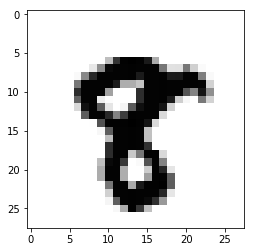

In [8]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

### 2. NN(Newral Nets) for MNIST

In [9]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# W1 = tf.Variable(tf.random_normal([784, 256]))
# b1 = tf.Variable(tf.random_normal([256]))
# L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# W2 = tf.Variable(tf.random_normal([256, 256]))
# b2 = tf.Variable(tf.random_normal([256]))
# L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

# W3 = tf.Variable(tf.random_normal([256, 10]))
# b3 = tf.Variable(tf.random_normal([10]))
# hypothesis = tf.matmul(L2, W3) + b3

# tf Graph input
W1 = tf.Variable(tf.random_normal([784, 256]))
W2 = tf.Variable(tf.random_normal([256, 256]))
W3 = tf.Variable(tf.random_normal([256, 10]))

b1 = tf.Variable(tf.random_normal([256]))
b2 = tf.Variable(tf.random_normal([256]))
b3 = tf.Variable(tf.random_normal([10]))

L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
# Softmax loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))     

# Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
# parameters
training_epochs = 15
batch_size = 100

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
time1 = time.time()
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), ' | cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')
time2 = time.time()

# bpc.chk_processting_time(time1, time2)

Epoch: 0001  | cost = 177.982685512
Epoch: 0002  | cost = 38.858910462
Epoch: 0003  | cost = 24.135219411
Epoch: 0004  | cost = 16.895824688
Epoch: 0005  | cost = 12.251669669
Epoch: 0006  | cost = 9.134999403
Epoch: 0007  | cost = 6.787242962
Epoch: 0008  | cost = 5.088744562
Epoch: 0009  | cost = 3.857519612
Epoch: 0010  | cost = 2.877424658
Epoch: 0011  | cost = 2.197693292
Epoch: 0012  | cost = 1.596975659
Epoch: 0013  | cost = 1.288613827
Epoch: 0014  | cost = 0.947307379
Epoch: 0015  | cost = 0.865229058
Learning Finished!
처리시간 : 0분 47초 경과되었습니다.


47.31706404685974

In [11]:
training_epochs, mnist.train.num_examples, total_batch

(15, 55000, 550)

Accuracy: 0.9465
Label:  [2]
Prediction:  [2]


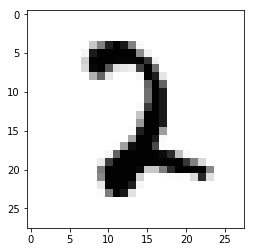

In [12]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


### 3. Xavier initialization

#### 방법 : initializer=tf.contrib.layers.xavier_initializer()

In [13]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
time1 = time.time()
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), ' | cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')
time2 = time.time()

# bpc.chk_processting_time(time1, time2)

Epoch: 0001  | cost = 0.307517038
Epoch: 0002  | cost = 0.118194564
Epoch: 0003  | cost = 0.077469013
Epoch: 0004  | cost = 0.054041942
Epoch: 0005  | cost = 0.039921121
Epoch: 0006  | cost = 0.030500028
Epoch: 0007  | cost = 0.026196581
Epoch: 0008  | cost = 0.020262506
Epoch: 0009  | cost = 0.016947473
Epoch: 0010  | cost = 0.013304636
Epoch: 0011  | cost = 0.013447090
Epoch: 0012  | cost = 0.010513373
Epoch: 0013  | cost = 0.011956148
Epoch: 0014  | cost = 0.009481524
Epoch: 0015  | cost = 0.009878563
Learning Finished!
처리시간 : 0분 51초 경과되었습니다.


51.70966100692749

Accuracy: 0.9781
Label:  [2]
Prediction:  [2]


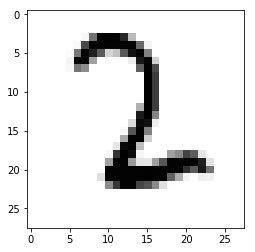

In [15]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>